## ConvNeXt @384 (tiny/small/base) 

- **Goal:** Fine-tune **ConvNeXt** (`convnext_tiny`/`small`/`base`) at **384×384**; evaluate with **AUC/ROC** and training curves.
- **Data/Transforms:** `preprocessed384_best/<class_name>/*`; `Resize(384) → ToTensor → Normalize(ImageNet)`.
- **Split:** Stratified **80/10/10** (train/val/test) via `StratifiedShuffleSplit` (no oversampling).
- **Backend:** Uses **timm** if available (`timm.create_model(model_name, pretrained=True, num_classes=K)`), else **torchvision** fallback with final `classifier[-1]` replaced to `Linear(..., K)`.
- **Train:** **CrossEntropy (label_smoothing=0.1)**, **AdamW (lr=1e-4, weight_decay=5e-4)**, **AMP** (`torch.amp.autocast` + `GradScaler`), `ReduceLROnPlateau` on **val acc**.  
  Batch size **16** (384px), optional **gradient accumulation** via `ACC_STEPS`.
- **Checkpoint:** Best by val acc → `checkpoints/{MODEL_NAME}_{IMG_SIZE}best.pth` (weights, `epoch`, `val_acc`, `classes`, `model_name`, `img_size`, `backend`).
- **Evaluate:** `classification_report`, **confusion matrix**, **per-class ROC**, **AUC OVR** (macro/weighted/micro) with safe handling for missing classes.
- **Plots:** Confusion matrix, ROC curves, and train/val **accuracy** & **loss** curves.


Device: cuda | Backend: timm
Classes: ['ARMD', 'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Train: 3782 | Val: 473 | Test: 473


Epoch 1/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:05<00:00,  2.17s/it]


✅ Epoch 1: train_acc=0.7443 val_acc=0.8266 | train_loss=0.8863 val_loss=0.7685
💾 Saved best model → checkpoints\convnext_small_384best.pth


Epoch 2/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:04<00:00,  2.17s/it]


✅ Epoch 2: train_acc=0.8776 val_acc=0.8922 | train_loss=0.6286 val_loss=0.6028
💾 Saved best model → checkpoints\convnext_small_384best.pth


Epoch 3/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:09<00:00,  2.33s/it]


✅ Epoch 3: train_acc=0.9035 val_acc=0.8922 | train_loss=0.5772 val_loss=0.6093


Epoch 4/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:04<00:00,  2.16s/it]


✅ Epoch 4: train_acc=0.9262 val_acc=0.9175 | train_loss=0.5479 val_loss=0.5520
💾 Saved best model → checkpoints\convnext_small_384best.pth


Epoch 5/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:08<00:00,  2.28s/it]


✅ Epoch 5: train_acc=0.9516 val_acc=0.9027 | train_loss=0.4987 val_loss=0.5921


Epoch 6/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:09<00:00,  2.30s/it]


✅ Epoch 6: train_acc=0.9574 val_acc=0.9133 | train_loss=0.4885 val_loss=0.5695


Epoch 7/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:24<00:00,  2.80s/it]


✅ Epoch 7: train_acc=0.9709 val_acc=0.9302 | train_loss=0.4584 val_loss=0.5497
💾 Saved best model → checkpoints\convnext_small_384best.pth


Epoch 8/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:05<00:00,  2.18s/it]


✅ Epoch 8: train_acc=0.9778 val_acc=0.9239 | train_loss=0.4399 val_loss=0.5580


Epoch 9/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:21<00:00,  2.73s/it]


✅ Epoch 9: train_acc=0.9770 val_acc=0.9239 | train_loss=0.4417 val_loss=0.6011


Epoch 10/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 30/30 [01:03<00:00,  2.11s/it]


✅ Epoch 10: train_acc=0.9677 val_acc=0.9070 | train_loss=0.4636 val_loss=0.6336


Epoch 11/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 30/30 [01:03<00:00,  2.12s/it]


✅ Epoch 11: train_acc=0.9923 val_acc=0.9323 | train_loss=0.4089 val_loss=0.5348
💾 Saved best model → checkpoints\convnext_small_384best.pth


Epoch 12/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 30/30 [01:04<00:00,  2.17s/it]


✅ Epoch 12: train_acc=0.9987 val_acc=0.9345 | train_loss=0.3961 val_loss=0.5481
💾 Saved best model → checkpoints\convnext_small_384best.pth

=== TEST EVALUATION (convnext_small, 384) ===


Test: 100%|████████████████████████████████████████████████████████████████████████████| 30/30 [01:03<00:00,  2.12s/it]



Classification Report (Test):
                      precision    recall  f1-score   support

                ARMD     1.0000    1.0000    1.0000        51
            cataract     0.9057    0.9231    0.9143       104
diabetic_retinopathy     0.9910    1.0000    0.9955       110
            glaucoma     0.9000    0.8020    0.8482       101
              normal     0.8870    0.9533    0.9189       107

            accuracy                         0.9302       473
           macro avg     0.9367    0.9357    0.9354       473
        weighted avg     0.9302    0.9302    0.9293       473



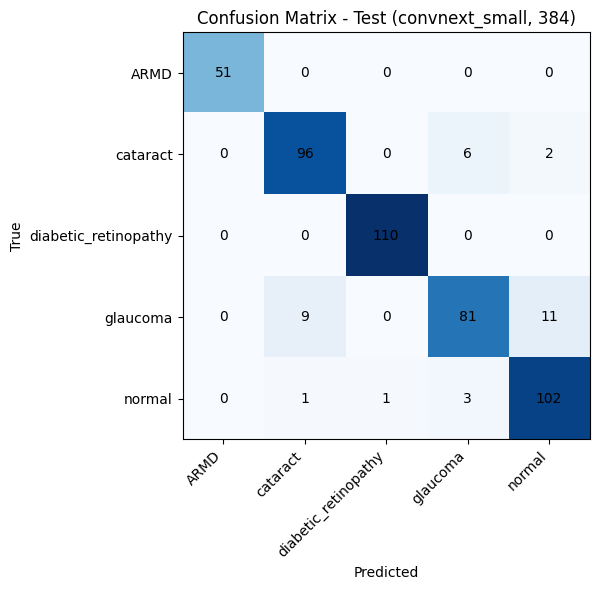


AUC (macro-OVR):    0.9859
AUC (weighted-OVR): 0.9847

AUC (micro-OVR):    0.9890


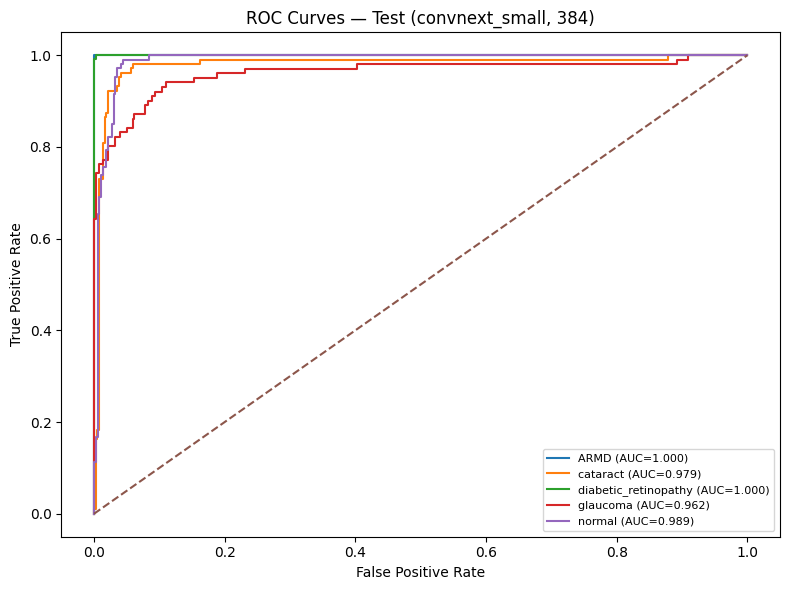

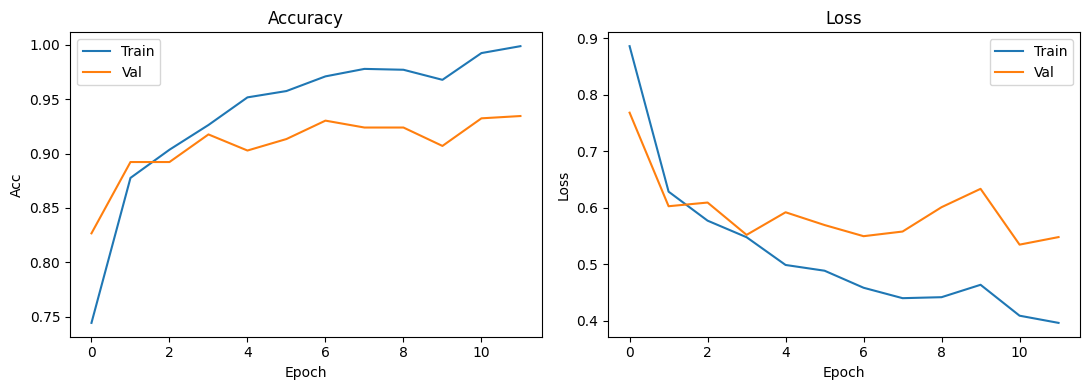

In [3]:
#### ConvNeXt (tiny/small/base) at 384 — 80/10/10 split, AMP, AUC/ROC, plots
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import models, transforms, datasets

# ========= CONFIG =========
DATA_ROOT    = r"preprocessed384_best"   # <-- set to your 384×384 preprocessed root
MODEL_NAME   = "convnext_small"          # "convnext_tiny" | "convnext_small" | "convnext_base"
IMG_SIZE     = 384
BATCH_SIZE   = 16                         # start smaller for 384; adjust to your VRAM
ACC_STEPS    = 1                          # gradient accumulation steps (set >1 if OOM)
EPOCHS       = 12
LR           = 1e-4
WEIGHT_DECAY = 5e-4                       # mild regularization at higher res
NUM_WORKERS  = 2
SAVE_DIR     = "checkpoints"
SEED         = 42
# ==========================

# Try timm; fallback to torchvision
_USE_TIMM = False
try:
    import timm
    _USE_TIMM = True
except Exception:
    _USE_TIMM = False

os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| Backend:", "timm" if _USE_TIMM else "torchvision")

# Repro
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True

# ---- Dataset & transforms (resize to 384) ----
norm_tfms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),   # safe even if already 384
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
])
base_ds = datasets.ImageFolder(root=DATA_ROOT, transform=norm_tfms)
num_classes = len(base_ds.classes)
print("Classes:", base_ds.classes)

targets = np.array(base_ds.targets)
indices = np.arange(len(base_ds))

# ---- 80/10/10 split (stratified) ----
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)  # 80/20
train_idx, temp_idx = next(sss1.split(indices, targets))
temp_targets = targets[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=SEED)  # 10/10 from temp
val_rel, test_rel = next(sss2.split(np.arange(len(temp_idx)), temp_targets))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

train_ds = Subset(base_ds, train_idx)
val_ds   = Subset(base_ds, val_idx)
test_ds  = Subset(base_ds, test_idx)

pin = torch.cuda.is_available()
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=pin)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)

print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}")

# ---- Model: ConvNeXt ----
def get_convnext(model_name: str, num_classes: int):
    if _USE_TIMM:
        return timm.create_model(model_name, pretrained=True, num_classes=num_classes)
    # torchvision fallback
    tv_map = {
        "convnext_tiny":  (models.convnext_tiny,  models.ConvNeXt_Tiny_Weights.DEFAULT),
        "convnext_small": (models.convnext_small, models.ConvNeXt_Small_Weights.DEFAULT),
        "convnext_base":  (models.convnext_base,  models.ConvNeXt_Base_Weights.DEFAULT),
    }
    if model_name not in tv_map:
        raise ValueError(f"Unsupported model_name for torchvision fallback: {model_name}")
    ctor, weights = tv_map[model_name]
    m = ctor(weights=weights)
    in_feats = m.classifier[-1].in_features
    m.classifier[-1] = nn.Linear(in_feats, num_classes)
    return m

model = get_convnext(MODEL_NAME, num_classes).to(device)

# ---- Loss / Optim / Sched / AMP ----
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # smoothing helps at high res
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=2)
scaler = torch.amp.GradScaler("cuda", enabled=torch.cuda.is_available())

# ---- Train ----
best_val_acc = 0.0
history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}
ckpt_name = f"{MODEL_NAME}_{IMG_SIZE}best.pth".replace(" ", "_")

for epoch in range(1, EPOCHS+1):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    optimizer.zero_grad(set_to_none=True)
    for step, (imgs, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS} [Train]"), start=1):
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            logits = model(imgs)
            loss = criterion(logits, labels)
            if ACC_STEPS > 1:
                loss = loss / ACC_STEPS  # scale for accumulation

        scaler.scale(loss).backward()

        if (step % ACC_STEPS == 0) or (step == len(train_loader)):
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)

        running_loss += loss.item() * (ACC_STEPS if ACC_STEPS > 1 else 1)
        preds = logits.argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / max(1, len(train_loader))
    train_acc  = correct / max(1, total)

    # ---- Val ----
    model.eval()
    v_loss, v_correct, v_total = 0.0, 0, 0
    all_probs = []
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{EPOCHS} [Val]"):
            imgs, labels = imgs.to(device), labels.to(device)
            with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
                logits = model(imgs)
                loss = criterion(logits, labels)
                probs = torch.softmax(logits, dim=1)

            v_loss += loss.item()
            preds = logits.argmax(1)
            v_correct += (preds == labels).sum().item()
            v_total += labels.size(0)
            all_probs.extend(probs.detach().cpu().numpy())

    val_loss = v_loss / max(1, len(val_loader))
    val_acc  = v_correct / max(1, v_total)

    history["train_loss"].append(train_loss); history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc);   history["val_acc"].append(val_acc)

    print(f"✅ Epoch {epoch}: train_acc={train_acc:.4f} val_acc={val_acc:.4f} | "
          f"train_loss={train_loss:.4f} val_loss={val_loss:.4f}")

    scheduler.step(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        ckpt_path = os.path.join(SAVE_DIR, ckpt_name)
        torch.save({
            "model_state": model.state_dict(),
            "val_acc": best_val_acc,
            "epoch": epoch,
            "classes": base_ds.classes,
            "model_name": MODEL_NAME,
            "img_size": IMG_SIZE,
            "backend": "timm" if _USE_TIMM else "torchvision",
        }, ckpt_path)
        print(f"💾 Saved best model → {ckpt_path}")

# ---- Final Test Evaluation ----
print(f"\n=== TEST EVALUATION ({MODEL_NAME}, {IMG_SIZE}) ===")
model.eval()
test_preds, test_labels, test_probs = [], [], []
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Test"):
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            logits = model(imgs)
            probs = torch.softmax(logits, dim=1)
        preds = logits.argmax(1)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        test_probs.extend(probs.cpu().numpy())

print("\nClassification Report (Test):")
print(classification_report(test_labels, test_preds, digits=4, target_names=base_ds.classes))

cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.title(f"Confusion Matrix - Test ({MODEL_NAME}, {IMG_SIZE})")
plt.xlabel("Predicted"); plt.ylabel("True")
for (i,j),v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.xticks(ticks=np.arange(num_classes), labels=base_ds.classes, rotation=45, ha="right")
plt.yticks(ticks=np.arange(num_classes), labels=base_ds.classes)
plt.tight_layout(); plt.show()

# ---- AUC + ROC ----
classes = list(range(num_classes))
y_true_bin = label_binarize(np.array(test_labels), classes=classes)
y_score = np.array(test_probs)
present_classes = np.unique(test_labels)
present_mask = np.isin(classes, present_classes)

def safe_auc(y_true, y_score, **kwargs):
    try:
        return roc_auc_score(y_true, y_score, **kwargs)
    except ValueError:
        return float("nan")

print(f"\nAUC (macro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='macro',    multi_class='ovr'):.4f}")
print(f"AUC (weighted-OVR): {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='weighted', multi_class='ovr'):.4f}")
print(f"\nAUC (micro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='micro',    multi_class='ovr'):.4f}")

plt.figure(figsize=(8,6))
for c in present_classes:
    fpr, tpr, _ = roc_curve(y_true_bin[:, c], y_score[:, c])
    class_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{base_ds.classes[c]} (AUC={class_auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.title(f"ROC Curves — Test ({MODEL_NAME}, {IMG_SIZE})")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=8); plt.tight_layout(); plt.show()

# ---- Train/Val curves ----
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(history["train_acc"], label="Train")
plt.plot(history["val_acc"],   label="Val")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend()
plt.subplot(1,2,2)
plt.plot(history["train_loss"], label="Train")
plt.plot(history["val_loss"],   label="Val")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout(); plt.show()
